# Diversity, Equity and Inclusion Analysis
dataset info:

Title: Human Resources Data Set

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

Date Accessed: October 5, 2023

In [7]:
# Importing py libraries
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Processing dataset into a py data frame
df = pd.read_csv('HRDataset_v14.csv')

In [9]:
# Emploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [10]:
# Analyzing Gender diversity by department

# Calculating gender ratio
gender_counts = df['GenderID'].value_counts()
gender_ratio = gender_counts / len(df)

# Gender distribution by department
gender_dept_distribution = df.groupby(['Department', 'GenderID'])['EmpID'].count()
print(gender_dept_distribution)


Department            GenderID
Admin Offices         0             6
                      1             3
Executive Office      0             1
IT/IS                 0            22
                      1            28
Production            0           126
                      1            83
Sales                 0            15
                      1            16
Software Engineering  0             6
                      1             5
Name: EmpID, dtype: int64


In [11]:
# Analyzing Distribution for Race and Ethnicity

# Calculate race or ethnicity distribution
race_counts = df['RaceDesc'].value_counts()

# Race or ethnicity distribution by department
race_dept_distribution = df.groupby(['Department', 'RaceDesc'])['EmpID'].count()
print(race_dept_distribution)

Department            RaceDesc                        
Admin Offices         Black or African American             5
                      White                                 4
Executive Office      White                                 1
IT/IS                 Asian                                 6
                      Black or African American            15
                      White                                29
Production            American Indian or Alaska Native      2
                      Asian                                21
                      Black or African American            45
                      Hispanic                              1
                      Two or more races                     6
                      White                               134
Sales                 American Indian or Alaska Native      1
                      Asian                                 1
                      Black or African American            10
               

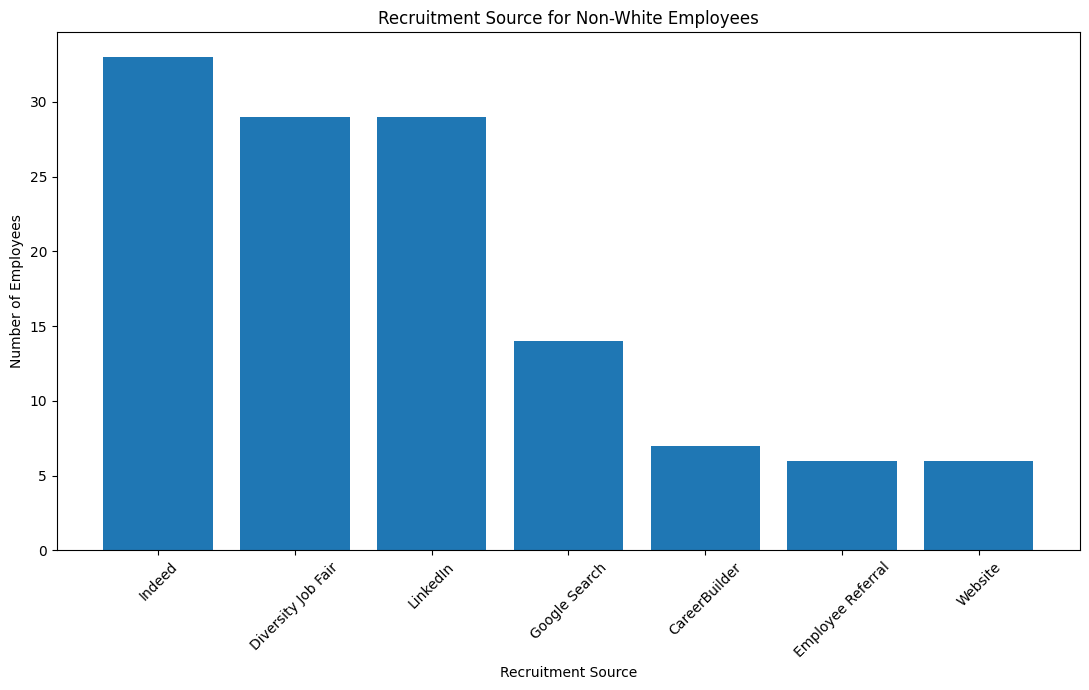

In [12]:
# Analyzing Recruitment Source for Non-White Employees

# Filtering the DataFrame to include only non-White employees
equity_deserving_employees = df[df['RaceDesc'] != 'White']

# Counting the number of employees in each recruitment source
recruitment_source_counts = equity_deserving_employees['RecruitmentSource'].value_counts()

# Creating a bar plot
plt.figure(figsize=(11, 7))
plt.bar(recruitment_source_counts.index, recruitment_source_counts.values)

# Adding labels and a title
plt.xlabel('Recruitment Source')
plt.ylabel('Number of Employees')
plt.title('Recruitment Source for Non-White Employees')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()  # Optional: Ensures the labels fit properly
plt.show()
